In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pylab import mpl, plt
import matplotlib.pyplot as plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'arial'
np.random.seed(1000)
np.set_printoptions(suppress=True, precision=4)
%matplotlib inline


import seaborn as sns
#import missingno as msno
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ConfusionMatrix

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression, SGDClassifier

from imblearn.over_sampling import SMOTE
from custom_functions import classification_results_report
from collections import Counter

Using TensorFlow backend.


In [2]:
camel_reduced = pd.read_csv('data/reduced_universe_after2010Q3.csv', index_col=0)

In [3]:
len(camel_reduced)

5880

In [4]:
camel_reduced_set = camel_reduced.dropna()

In [5]:
y_reduced = camel_reduced_set['Target']
X_reduced = camel_reduced_set.drop(['Target'], axis=1)

In [6]:
X_re_train, X_re_test, y_re_train, y_re_test = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=1, stratify=y_reduced)

In [7]:
scaler = StandardScaler()
scaler.fit(X_re_train)
X_re_train_std = scaler.transform(X_re_train)
X_re_test_std = scaler.transform(X_re_test)

In [8]:
log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X_re_train_std,y_re_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
log_y_re_train_pred = cross_val_predict(log_reg, X_re_train_std, y_re_train, cv=3)
confusion_matrix(y_re_train, log_y_re_train_pred)

array([[4609,   15],
       [  50,   30]])

In [10]:
f1_score(y_re_train, log_y_re_train_pred)

0.4800000000000001

In [11]:
sgd_clf = SGDClassifier(random_state=1)
sgd_clf.fit(X_re_train_std, y_re_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=1, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
sgd_y_re_train_pred = cross_val_predict(sgd_clf, X_re_train_std, y_re_train, cv=3)
confusion_matrix(y_re_train, sgd_y_re_train_pred)

array([[4609,   15],
       [  39,   41]])

In [13]:
f1_score(y_re_train, sgd_y_re_train_pred)

0.6029411764705882

## Over-sampling with SMOTE

In [9]:
camel_insample = pd.read_csv('data/camel_data_after2010Q3.csv', index_col = 0)
len(camel_insample.index)

7020

In [10]:
camel_model_set = camel_insample.dropna()
len(camel_model_set)

7014

In [11]:
len(camel_model_set.loc[camel_model_set.Target == 1])

137

In [17]:
camel_model_set.drop(columns=['AsOfDate']).head()

,Target,EQTA,EQTL,LLRTA,LLRGL,OEXTA,INCEMP,ROA,ROE,TDTL,TDTA,TATA
1252,1,0.008644,0.010834,0.092012,0.115320,0.025272,-593.165644,-0.136337,-15.772594,1.232007,0.982991,0.112894
3287,1,0.078408,0.189268,0.003523,0.008503,0.022508,20.900000,0.003875,0.049421,2.205290,0.913583,0.358536
5672,1,0.002112,0.003144,0.066657,0.099216,0.034378,-323.516556,-0.058455,-27.677620,1.383128,0.929228,0.135505
5702,1,0.015982,0.021148,0.030035,0.039743,0.039763,-153.596354,-0.049911,-3.123001,1.195850,0.903733,0.094482
8221,1,0.011542,0.013393,0.041798,0.048502,0.038922,-217.888889,-0.069640,-6.033846,1.145630,0.987286,0.098334


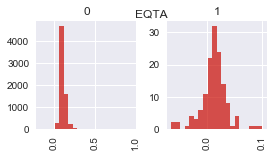

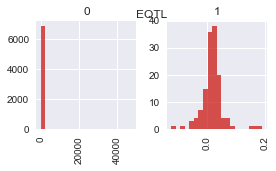

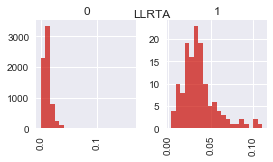

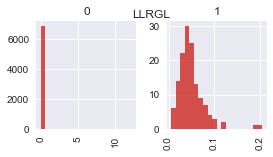

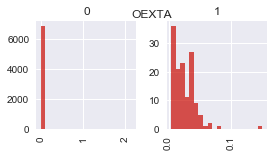

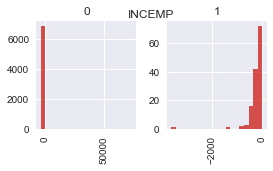

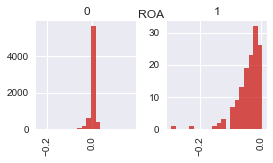

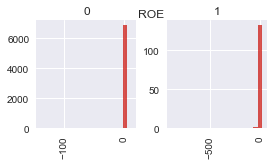

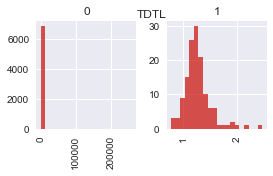

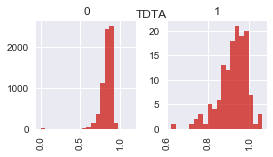

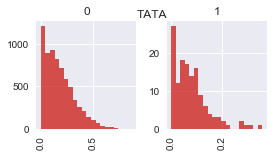

In [138]:
for col in camel_model_set.drop(columns=['AsOfDate', 'Target']).columns:
    camel_model_set[col].hist(by=camel_model_set['Target'],  bins=20, figsize=(4,2), alpha=0.7, color='r')
    plt.suptitle(col)
plt.show()

In [12]:
y = camel_model_set['Target']
X = camel_model_set.drop(['Target', 'AsOfDate'], axis=1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [14]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [15]:
print('Original dataset shape %s' % Counter(y_train))
#Original dataset shape Counter({1: 900, 0: 100})
sm = SMOTE(random_state=42)
X_train_std_res, y_train_res = sm.fit_resample(X_train_std, y_train)
print('Resampled dataset shape %s' % Counter(y_train_res))
# Resampled dataset shape Counter({0: 900, 1: 900})

Original dataset shape Counter({0: 5501, 1: 110})
Resampled dataset shape Counter({0: 5501, 1: 5501})


In [16]:
log_reg_res = LogisticRegression(solver='lbfgs')
log_reg_res.fit(X_train_std_res, y_train_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
log_reg_res.score(X_train_std_res, y_train_res)

0.9751863297582257

In [18]:
log_reg_res.score(X_test_std, y_test)

0.9714896650035638

In [19]:
log_reg_res_y_train_pred = cross_val_predict(log_reg_res, X_train_std_res, y_train_res, cv=3)
confusion_matrix(y_train_res, log_reg_res_y_train_pred)

array([[5338,  163],
       [ 117, 5384]])

In [20]:
f1_score(y_train_res, log_reg_res_y_train_pred)

0.9746560463432296

In [21]:
log_reg_res_y_test_pred = cross_val_predict(log_reg_res, X_test_std, y_test, cv=3)
confusion_matrix(y_test, log_reg_res_y_test_pred)

array([[1371,    5],
       [  12,   15]])

In [22]:
f1_score(y_test, log_reg_res_y_test_pred)

0.6382978723404256

In [23]:
# Out of sample validation on 2011 Q3 data

camel_outofsample = pd.read_csv('data/camel_data_after2011Q3_OOS.csv', index_col = 0)
camel_validation_set = camel_outofsample.dropna()
len(camel_validation_set.loc[camel_validation_set.Target == 1])

18

In [24]:
y_oos = camel_validation_set['Target']
X_oos = camel_validation_set.drop(['Target', 'AsOfDate'], axis=1)
log_reg_res_pred = log_reg_res.predict(X_oos)
Counter(log_reg_res_pred)

Counter({0: 6583, 1: 46})

In [25]:
confusion_matrix(y_oos, log_reg_res_pred)

array([[6565,   46],
       [  18,    0]])

In [26]:
f1_score(y_oos, log_reg_res_pred)

0.0

In [27]:
# To get the value of precision we divide the total number of correctly classified positive examples 
# by the total number of predicted positive examples. 
# High Precision indicates an example labeled as positive is indeed positive (small number of FP).
precision_score(y_oos, log_reg_res_pred)

0.0

In [28]:
# Recall can be defined as the ratio of the total number of correctly classified positive 
# examples divide to the total number of positive examples. 
# High Recall indicates the class is correctly recognized (small number of FN).
recall_score(y_oos, log_reg_res_pred)

0.0

In [29]:
sgd_clf_res = SGDClassifier(random_state=1)
sgd_clf_res.fit(X_train_std_res, y_train_res)

sgd_clf_y_train_res_pred = cross_val_predict(sgd_clf_res, X_train_std_res, y_train_res, cv=3)
confusion_matrix(y_train_res, sgd_clf_y_train_res_pred)

array([[5318,  183],
       [ 114, 5387]])

In [30]:
sgd_clf_y_test_pred = cross_val_predict(sgd_clf_res, X_test_std, y_test, cv=3)
confusion_matrix(y_test, sgd_clf_y_test_pred)

array([[1372,    4],
       [  13,   14]])

In [31]:
f1_score(y_test, sgd_clf_y_test_pred)

0.6222222222222222

In [32]:
sgd_clf_res_pred = sgd_clf_res.predict(X_oos)
confusion_matrix(y_oos, sgd_clf_res_pred)

array([[5655,  956],
       [   0,   18]])

In [33]:
classification_results_report(y_oos, sgd_clf_res_pred)

Confusion Matrix :
[[5655  956]
 [   0   18]]
Accuracy Score : 0.8557851863026097
Report : 
              precision    recall  f1-score   support

           0       1.00      0.86      0.92      6611
           1       0.02      1.00      0.04        18

    accuracy                           0.86      6629
   macro avg       0.51      0.93      0.48      6629
weighted avg       1.00      0.86      0.92      6629



In [35]:
# Out of sample validation on 2019 Q2 data

camel_outofsample2 = pd.read_csv('data/camel_data_after2019Q2_OOS.csv', index_col = 0)
camel_validation_set2 = camel_outofsample2.dropna()
len(camel_validation_set2.loc[camel_validation_set2.Target == 1])

1

In [36]:
y_oos2 = camel_validation_set2['Target']
X_oos2 = camel_validation_set2.drop(['Target', 'AsOfDate'], axis=1)
sgd_clf_res_pred2 = sgd_clf_res.predict(X_oos2)
Counter(sgd_clf_res_pred2)

Counter({0: 5025, 1: 169})

In [96]:
sgd_clf_res_pred2 = sgd_clf_res.predict(X_oos2)
confusion_matrix(y_oos2, sgd_clf_res_pred2)

array([[5024,  169],
       [   1,    0]])

In [97]:
precision_score(y_oos2, sgd_clf_res_pred2)

0.0

In [98]:
recall_score(y_oos2, sgd_clf_res_pred2)

0.0

In [37]:
classification_results_report(y_oos2, sgd_clf_res_pred2)

Confusion Matrix :
[[5024  169]
 [   1    0]]
Accuracy Score : 0.96726992683866
Report : 
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      5193
           1       0.00      0.00      0.00         1

    accuracy                           0.97      5194
   macro avg       0.50      0.48      0.49      5194
weighted avg       1.00      0.97      0.98      5194



## Load and inspect the data for the model and validation sets

In [2]:
camel_insample = pd.read_csv('data/camel_data_after2010Q3.csv', index_col = 0)
camel_outofsample = pd.read_csv('data/camel_data_after2011Q3_OOS.csv', index_col = 0)

In [3]:
len(camel_insample.index)

7020

In [4]:
camel_model_set = camel_insample.dropna()

In [5]:
len(camel_model_set)

7014

In [6]:
len(camel_model_set.loc[camel_model_set.Target == 1])

137

In [10]:
y = camel_model_set['Target']
X = camel_model_set.drop(['Target', 'AsOfDate'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [12]:
len(y == 1)

7014

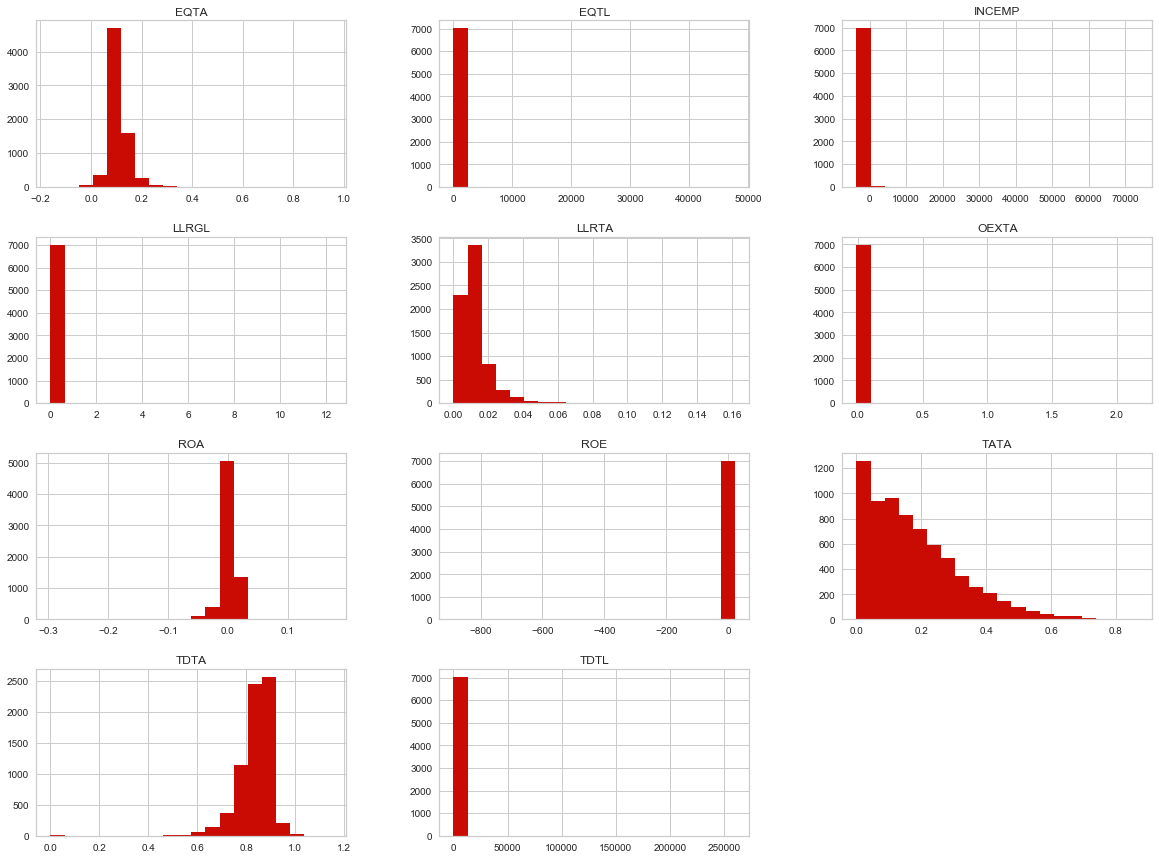

In [20]:
camel_model_set_eda = camel_model_set.drop(['AsOfDate', 'Target'], axis=1) #Drop control var for EDA purposes
camel_model_set_eda.hist(figsize=(20,15), alpha=1, bins=20, color='r')
plt.xticks(rotation=0)
plt.show()

(-5, 5)

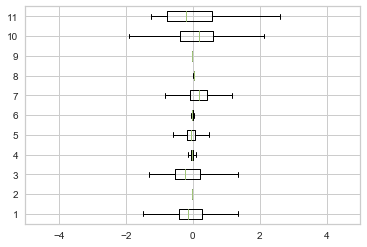

In [25]:
scaler = StandardScaler()
camel_model_set_eda_std = scaler.fit_transform(camel_model_set_eda)
plt.boxplot(camel_model_set_eda_std, vert=False, sym='r+')
plt.xlim(-5, 5 )

In [76]:
len(camel_outofsample.index)

6635

In [77]:
camel_validation_set = camel_outofsample.dropna()

In [78]:
len(camel_validation_set.index)

6629

In [79]:
len(camel_validation_set.loc[camel_validation_set.Target == 1])

18

In [80]:
y = camel_model_set['Target']
X = camel_model_set.drop(['Target', 'AsOfDate'], axis=1)

## PCA decomposition - checking if all features add value

In [140]:
# Standardizing the features for PCS
X_pca_std = StandardScaler().fit_transform(X)

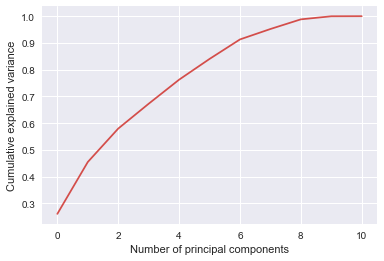

In [142]:
# Run PCA and plot explained variance
pca = PCA().fit(X_pca_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_), alpha=0.7, color='r')
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance');

## All CAMELS features should be used for classification

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [84]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

## In-sample modeling with Logistic regression

In [85]:
log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X_train_std,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
log_reg.coef_

array([[-3.8914, -0.0101,  0.122 , -0.0417, -1.484 ,  0.0387, -0.0926,
        -0.0062, -0.0188,  0.0174, -0.5905]])

In [87]:
log_reg.score(X_train_std, y_train)

0.9878809481375869

In [88]:
log_reg.score(X_test_std, y_test)

0.992872416250891

In [89]:
log_y_train_pred = cross_val_predict(log_reg, X_train_std, y_train, cv=3)
confusion_matrix(y_train, log_y_train_pred)

array([[5475,   26],
       [  47,   63]])

In [99]:
f1_score(y_train, log_y_train_pred)

0.6331658291457287

## Out-of-sample validation for Logistic regression

In [91]:
y_oos = camel_validation_set['Target']
X_oos = camel_validation_set.drop(['Target', 'AsOfDate'], axis=1)
log_pred = log_reg.predict(X_oos)
accuracy_score(y_oos, log_pred)
f1_score(y_oos, log_pred)

0.9907980087494344

In [98]:
log_pred == 1

array([False, False, False, ..., False, False, False])

0.0

## SGD resulst

In [100]:
sgd_clf = SGDClassifier(random_state=1)
sgd_clf.fit(X_train_std, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=1, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [101]:
sgd_clf.score(X_train_std, y_train)

0.988950276243094

In [102]:
sgd_clf.score(X_test_std, y_test)

0.9900213827512473

In [103]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train_std, y_train, cv=3, scoring='accuracy')

array([0.9872, 0.9872, 0.9904])

In [104]:
cross_val_score(log_reg, X_train_std, y_train, cv=3, scoring='accuracy')

array([0.9856, 0.9845, 0.9909])

In [105]:
# Accuracy score is generally not a good performance measure for classifiers, especially when you are dealing with 
# skewed datasets (when some classes are much more frequent than others) -- check with confusing matrix below:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
sgd_y_train_pred = cross_val_predict(sgd_clf, X_train_std, y_train, cv=3)
confusion_matrix(y_train, sgd_y_train_pred)

array([[5467,   34],
       [  32,   78]])

In [106]:
sgd_pred = sgd_clf.predict(X_oos)
accuracy_score(y_oos, sgd_pred)

0.9820485744456178

In [107]:
f1_score(y_oos, sgd_pred)

0.16783216783216784

In [35]:
# Same terrible results for logit regression:
log_y_train_pred = cross_val_predict(log_reg, X_train_std, y_train, cv=3)
confusion_matrix(y_train, log_y_train_pred)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[5477,   24],
       [  49,   61]])

## To get the value of precision we divide the total number of correctly classified positive examples by the total number of predicted positive examples. High Precision indicates an example labeled as positive is indeed positive (small number of FP).

In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_train, sgd_y_train_pred) #SGD precision

0.6964285714285714

In [37]:
precision_score(y_train, log_y_train_pred) #Logit precision

0.7176470588235294

## Recall can be defined as the ratio of the total number of correctly classified positive examples divide to the total number of positive examples. High Recall indicates the class is correctly recognized (small number of FN).

In [38]:
recall_score(y_train, sgd_y_train_pred) #SGD precision

0.7090909090909091

In [39]:
recall_score(y_train, log_y_train_pred) #Logit recall

0.5545454545454546

## High recall, low precision:This means that most of the positive examples are correctly recognized (low FN) but there are a lot of false positives. Low recall, high precision:This shows that we miss a lot of positive examples (high FN) but those we predict as positive are indeed positive (low FP)

In [40]:
f1_score(y_train, log_y_train_pred)

0.6256410256410256

In [41]:
f1_score(y_train, sgd_y_train_pred)

0.7027027027027026

In [38]:
# Precision/Recall tradeoff 
from sklearn.metrics import precision_recall_curve

sgd_y_scores = cross_val_predict(sgd_clf, X_train_std, y_train, cv=3, method='decision_function')
sgd_precisions, sgd_recalls, sgd_thresholds = precision_recall_curve(y_train, sgd_y_scores)

plot_precision_recall(sgd_precisions, sgd_recalls, sgd_thresholds)
plt.show()

NameError: name 'sgd_clf' is not defined

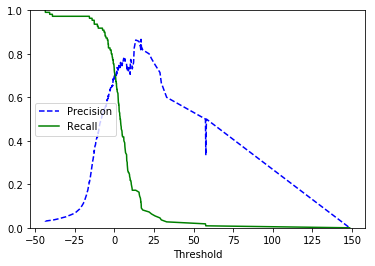

In [43]:
 #Represent Precision and Recall graphically
def plot_precision_recall(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[: -1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[: -1], 'g-', label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='center left')
    plt.ylim([0,1])

plot_precision_recall(sgd_precisions, sgd_recalls, sgd_thresholds)
plt.show()

In [44]:
# Logit needs predict_proba output fist

# log_y_scores = cross_val_predict(log_reg, X_train_std, y_train, cv=3, method='decison_function')
# log_precisions, log_recalls, log_thresholds = precision_recall_curve(y_train, log_y_scores)
# plot_precision_recall(log_precisions, log_recalls, log_thresholds)
# plt.show()

In [45]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, sgd_y_scores)

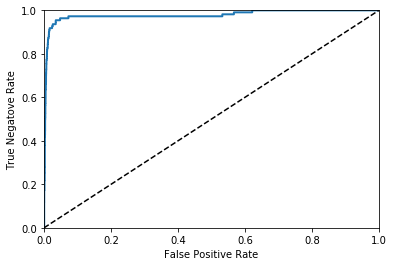

In [46]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Negatove Rate')
plot_roc_curve(fpr, tpr)